In [2]:
from google.cloud import bigquery
import pandas as pd
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]= r"C:\Users\arthu\OneDrive\Ambiente de Trabalho\Projects\key.json"
client = bigquery.Client()

## SELECT * FROM `fh-bigquery.weather_gsod.stations` WHERE name ="CURITIBA" 
## SELECT * FROM `fh-bigquery.weather_gsod.__TABLES__` 


query = """
    SELECT state, name, lat, lon
    FROM fh-bigquery.weather_gsod.stations
    WHERE country='BZ' AND name='SAO PAULO'
    LIMIT 30
"""
df = pd.read_gbq(query, dialect='standard')
df


  state       name      lat      lon
0  None  SAO PAULO -23500.0 -46617.0


In [6]:
query = """
    SELECT *
    FROM `fh-bigquery.weather_gsod.stations` WHERE name ="SAO PAULO"
"""

df_location = pd.read_gbq(query)
df_location

,usaf,wban,name,country,fips,state,call,lat,lon,elev,begin,end
0,837810,99999,SAO PAULO,BZ,BR,None,None,-23500.0,-46617.0,7920,19730101,20100428


In [7]:
query = """
SELECT * FROM `fh-bigquery.weather_gsod.__TABLES__`
"""

df_tables = pd.read_gbq(query)
df_tables

,project_id,dataset_id,table_id,creation_time,last_modified_time,row_count,size_bytes,type
0,fh-bigquery,weather_gsod,all,1567654542095,1598046001324,155852507,49765427093,1
1,fh-bigquery,weather_gsod,all_20191114_copy,1573756683222,1573756683222,152678184,48748387264,1
2,fh-bigquery,weather_gsod,all_geoclustered,1567810947385,1597969776066,152236272,48607114661,1
3,fh-bigquery,weather_gsod,gsod1929,1422594813268,1422594813268,2081,383935,1
4,fh-bigquery,weather_gsod,gsod1930,1422594924816,1422594924816,7285,1342700,1
...,...,...,...,...,...,...,...,...
88,fh-bigquery,weather_gsod,gsod2014,1422315236647,1422320944529,4115582,769185623,1
89,fh-bigquery,weather_gsod,gsod2015,1422319014154,1452834512034,4200939,784964925,1
90,fh-bigquery,weather_gsod,gsod2016,1452818743847,1475641642506,153706,28756392,1
91,fh-bigquery,weather_gsod,stations,1422004083189,1422004083189,31700,2474640,1


In [8]:
query = """
    SELECT *
    FROM `fh-bigquery.weather_gsod.all`
    WHERE name = 'SAO PAULO'
"""
    
df_temp = pd.read_gbq(query)
df_temp

,date,wban,stn,year,mo,da,temp,count_temp,dewp,count_dewp,...,country,state,call,lat,lon,elev,begin,end,point_gis,fake_date
0,1979-05-29,99999,837810,1979,05,29,67.1,4,56.8,4,...,BR,None,None,-23.5,-46.617,+0792.0,19730101,20100428,POINT(-46.617 -23.5),2000-01-01
1,1979-03-27,99999,837810,1979,03,27,62.2,4,56.3,4,...,BR,None,None,-23.5,-46.617,+0792.0,19730101,20100428,POINT(-46.617 -23.5),2000-01-01
2,1979-04-09,99999,837810,1979,04,09,60.8,4,56.3,4,...,BR,None,None,-23.5,-46.617,+0792.0,19730101,20100428,POINT(-46.617 -23.5),2000-01-01
3,1979-02-08,99999,837810,1979,02,08,77.4,4,66.2,4,...,BR,None,None,-23.5,-46.617,+0792.0,19730101,20100428,POINT(-46.617 -23.5),2000-01-01
4,1979-08-20,99999,837810,1979,08,20,59.0,4,56.8,4,...,BR,None,None,-23.5,-46.617,+0792.0,19730101,20100428,POINT(-46.617 -23.5),2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,1979-02-22,99999,837810,1979,02,22,67.3,5,64.0,5,...,BR,None,None,-23.5,-46.617,+0792.0,19730101,20100428,POINT(-46.617 -23.5),2000-01-01
411,1979-09-01,99999,837810,1979,09,01,74.5,5,60.8,5,...,BR,None,None,-23.5,-46.617,+0792.0,19730101,20100428,POINT(-46.617 -23.5),2000-01-01
412,1979-04-28,99999,837810,1979,04,28,61.2,5,55.4,5,...,BR,None,None,-23.5,-46.617,+0792.0,19730101,20100428,POINT(-46.617 -23.5),2000-01-01
413,1979-06-01,99999,837810,1979,06,01,43.5,5,33.8,5,...,BR,None,None,-23.5,-46.617,+0792.0,19730101,20100428,POINT(-46.617 -23.5),2000-01-01


In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
df_temp.sort_index()
df_temp = df_temp.set_index(pd.DatetimeIndex(df_temp['date']))
df_temp.to_csv('temp.csv')


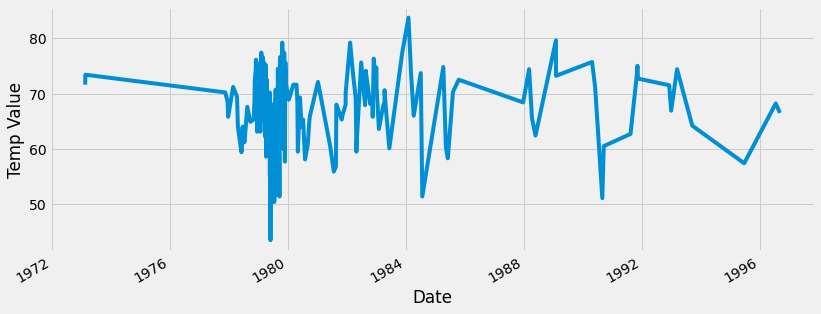

In [21]:
plt.figure(figsize=(12.2,5))
df_temp['temp'].plot()
plt.xlabel('Date')
plt.ylabel('Temp Value')
plt.show()


In [36]:
query = """
    SELECT column_name
    FROM fh-bigquery.weather_gsod.INFORMATION_SCHEMA.COLUMNS
    WHERE table_name = 'gsod2016'
"""

columns = pd.read_gbq(query)
columns

,column_name
0,stn
1,wban
2,year
3,mo
4,da
5,temp
6,count_temp
7,dewp
8,count_dewp
9,slp


In [62]:
query = """
    SELECT T.stn,T.year,T.mo,T.da,T.temp 
    FROM `fh-bigquery.weather_gsod.gsod*` T LEFT JOIN `fh-bigquery.weather_gsod.stations` L
    ON T.stn = L.usaf
    WHERE L.country = "BZ" AND  T._TABLE_SUFFIX BETWEEN '2015' AND '2016'
"""
    
df_temp2016 = pd.read_gbq(query)
df_temp2016

,stn,year,mo,da,temp
0,817170,2015,01,05,80.6
1,817170,2015,01,06,82.3
2,817170,2015,01,10,81.7
3,817170,2015,01,17,82.2
4,817170,2015,01,30,81.9
...,...,...,...,...,...
41834,839850,2016,01,08,72.2
41835,839850,2016,01,11,79.1
41836,839850,2016,01,12,78.7
41837,868910,2016,01,06,80.2


In [63]:
df_temp2016.columns = ['stn','year','month','day','temp']
df_temp2016['date'] = pd.to_datetime(df_temp2016[['year', 'month', 'day']])
df_temp2016 = df_temp2016.set_index(df_temp2016['date'])
df_temp2016

,stn,year,month,day,temp,date
date,,,,,,
2015-01-05,817170,2015,01,05,80.6,2015-01-05
2015-01-06,817170,2015,01,06,82.3,2015-01-06
2015-01-10,817170,2015,01,10,81.7,2015-01-10
2015-01-17,817170,2015,01,17,82.2,2015-01-17
2015-01-30,817170,2015,01,30,81.9,2015-01-30
...,...,...,...,...,...,...
2016-01-08,839850,2016,01,08,72.2,2016-01-08
2016-01-11,839850,2016,01,11,79.1,2016-01-11
2016-01-12,839850,2016,01,12,78.7,2016-01-12


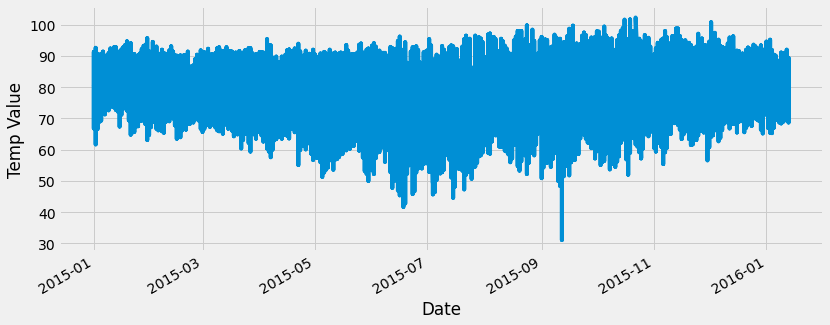

In [64]:
plt.figure(figsize=(12.2,5))
df_temp2016['temp'].plot()
plt.xlabel('Date')
plt.ylabel('Temp Value')
plt.show()

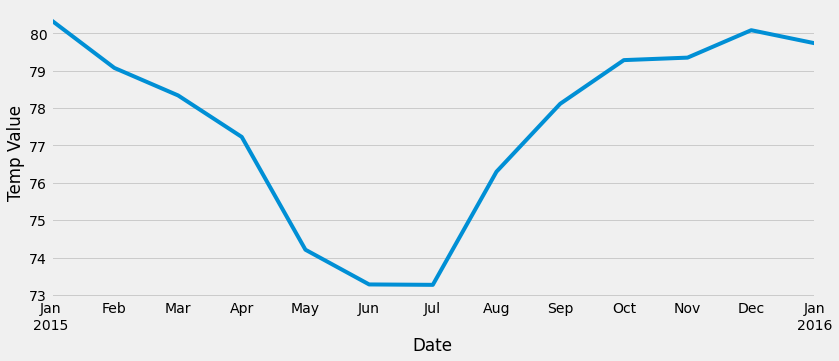

In [67]:
df_month = df_temp2016.groupby(pd.Grouper(freq="M")).mean()
plt.figure(figsize=(12.2,5))
df_month['temp'].plot()
plt.xlabel('Date')
plt.ylabel('Temp Value')
plt.show()